# E- Commerce Customer Segmentation

Customer segmentation is the process of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing. This can be useful for identifying specific market segments and developing targeted marketing campaigns.

A machine learning project focused on customer segmentation could involve collecting data on customer demographics, purchasing habits, and other relevant factors, and using this data to train a model to predict which segment a given customer belongs to. The model could then be used to predict the segment of new customers and to tailor marketing campaigns to specific segments.

The project might involve exploring different features and algorithms to find the most effective approach for segmenting the customer base. This could involve preprocessing and cleaning the data, selecting relevant features, and testing different models to determine the best fit.

Once the model is trained and deployed, it could be used to generate insights about the customer segments and to create targeted marketing campaigns. The results of these campaigns could be tracked and used to refine the model and improve the accuracy of the customer segmentation.

# Clustering Approach

To begin the project, you would need to preprocess and clean the data, selecting relevant features and possibly scaling or transforming the data to make it more suitable for clustering. You could then use a clustering algorithm, such as k-means or DBSCAN, to group the customers into clusters based on their similarities.

Once the clusters have been identified, you could analyze the characteristics of each cluster to understand the common traits of the customers in each group. This could involve generating statistics and visualizations to understand the distribution of different features within each cluster.


In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
data = pd.read_csv("marketing_campaign.csv", sep="\t")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

## Income has Missing values    

In [4]:
#To remove the NA values
data = data.dropna()

In [5]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [6]:
names = data['Education']
unique_names = names.unique()

print(unique_names)

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [7]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i) 

In [8]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [9]:
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [10]:
#Feature Engineering
#Age of customer today 
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [11]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,128.000000,2525.000000,3.000000,5.000000,1.000000


In [12]:
#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


In [13]:
updnames = data['Education']
updunique_names = updnames.unique()

print(updunique_names)

['Graduate' 'Postgraduate' 'Undergraduate']


In [14]:
data

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,64,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,67,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,56,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,37,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,40,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,46742400000000000,54,1341,Partner,1,3,1
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,5270400000000000,75,444,Partner,3,5,1
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,27216000000000000,40,1241,Alone,0,1,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,27302400000000000,65,843,Partner,1,3,1


In [15]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [16]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [17]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")
ds

All features are now scaled


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,83894400000000000,64,1617,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,10800000000000000,67,27,0,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,40780800000000000,56,776,1,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,5616000000000000,37,53,1,1,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,27734400000000000,40,422,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,0,1,46,709,43,182,42,118,...,3,4,5,46742400000000000,54,1341,1,1,3,1
2236,1,64014.0,2,1,56,406,0,30,0,0,...,2,5,7,5270400000000000,75,444,1,3,5,1
2237,0,56981.0,0,0,91,908,48,217,32,12,...,3,13,6,27216000000000000,40,1241,0,0,1,0
2238,1,69245.0,0,1,8,428,30,214,80,30,...,5,10,3,27302400000000000,65,843,1,1,3,1


In [18]:
scaled_ds

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.893586,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,...,0.111982,-0.555814,-0.132545,0.124112,0.163575,1.218061,0.740959,0.069987,0.449070,0.632456
2208,0.571657,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,...,-0.229679,-0.248141,0.692181,-1.940414,1.958607,-0.271040,0.740959,2.739158,2.656499,0.632456
2209,-0.893586,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,...,0.111982,2.213242,0.279818,-0.847936,-1.033114,1.052052,-1.349603,-1.264598,-1.758359,-1.581139
2210,0.571657,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,...,0.795303,1.290224,-0.957271,-0.843635,1.103830,0.391336,0.740959,0.069987,0.449070,0.632456


In [19]:


import matplotlib. pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(scaled_ds)

#plt.figure()
#plt.plot(np.cumsum(pca.explained_variance_ratio_))

#plt.title('Explained Variance')
#plt.show()}


In [20]:
PCA =pd.DataFrame(principalComponents)

PCA

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,4.994347,-0.151247,2.647792,-0.151491,0.991784,-0.574264,-0.624872,-1.114653,1.830784,0.817346,...,-0.542374,0.820922,0.275061,0.572402,-0.195936,-0.488874,0.252379,-1.586856e-15,1.260735e-14,-5.705789e-15
1,-2.884455,-0.006676,-1.863861,-1.472022,1.788765,0.549587,0.064884,-0.032784,0.733179,0.541116,...,0.023527,-0.063893,-0.158118,-0.046082,-0.137393,-0.189462,-0.050282,5.639018e-14,2.067080e-15,1.031985e-15
2,2.617864,-0.720770,-0.252259,-0.034561,-0.641760,0.599061,-1.615866,0.057634,-0.742981,-0.543140,...,0.183185,0.825611,0.877971,-0.474656,-0.359544,-0.498812,-0.263290,-1.015224e-14,1.292354e-14,2.341879e-15
3,-2.676036,-1.541974,-0.922759,1.190909,0.585116,1.057183,-0.589718,1.113229,-0.989177,0.134882,...,0.003779,0.205737,-0.326078,0.315385,0.133150,0.230860,0.221047,-5.535781e-15,-3.626855e-15,4.024353e-15
4,-0.649591,0.209848,-0.021028,1.659558,0.289104,-0.944834,1.388581,0.660560,-0.889756,0.321708,...,-0.111026,0.028351,0.588745,0.426696,-0.516991,0.357966,-0.395458,1.727764e-16,-3.994499e-16,4.541610e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,2.321341,2.436277,0.518645,0.652558,0.598568,0.112828,-1.458323,-1.118143,-2.031768,1.068882,...,0.889328,-1.176194,-0.613703,-0.368177,-0.392022,0.673076,0.440906,6.556107e-17,-1.431641e-17,-4.099210e-17
2208,-3.105957,4.020968,-1.499273,0.473705,0.064328,0.237460,1.391919,0.986476,0.254189,1.642890,...,0.445269,-0.285829,0.578375,-0.526395,-0.493406,-0.759089,-0.142095,-1.808249e-16,3.243781e-16,-2.273923e-17
2209,2.673666,-1.869157,0.594264,-1.046906,0.833747,-1.197525,0.193778,1.947638,-0.722190,-1.064559,...,-0.660964,0.041125,-1.692137,-0.142491,0.189578,-0.778953,-0.170224,-1.261823e-16,-1.620324e-16,-4.111619e-16
2210,1.494055,1.701855,-1.627265,-0.531814,-0.965947,1.415128,-0.046320,-0.341249,-0.407117,0.058453,...,0.186637,0.561758,0.189382,0.655067,0.354495,0.151403,-0.009497,-6.603616e-17,-1.312455e-16,-8.930791e-17


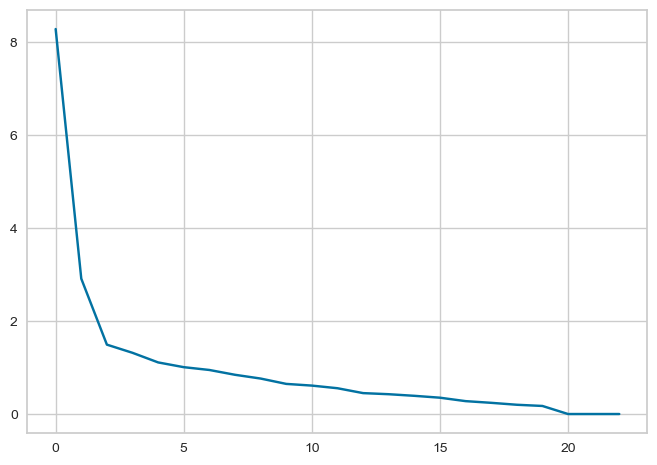

In [21]:
explained_variance = pca.explained_variance_
plt.plot(explained_variance)


In [22]:
explained_variance = pca.explained_variance_
explained_variance

array([8.28505283e+00, 2.91329944e+00, 1.49317885e+00, 1.31724994e+00,
       1.11063290e+00, 1.00837773e+00, 9.47934549e-01, 8.44510443e-01,
       7.63484983e-01, 6.48332958e-01, 6.11921771e-01, 5.55103088e-01,
       4.50048396e-01, 4.26366869e-01, 3.91898395e-01, 3.51324474e-01,
       2.77519493e-01, 2.41092058e-01, 1.99477131e-01, 1.73596231e-01,
       1.59354751e-30, 1.85166030e-31, 7.38030774e-32])

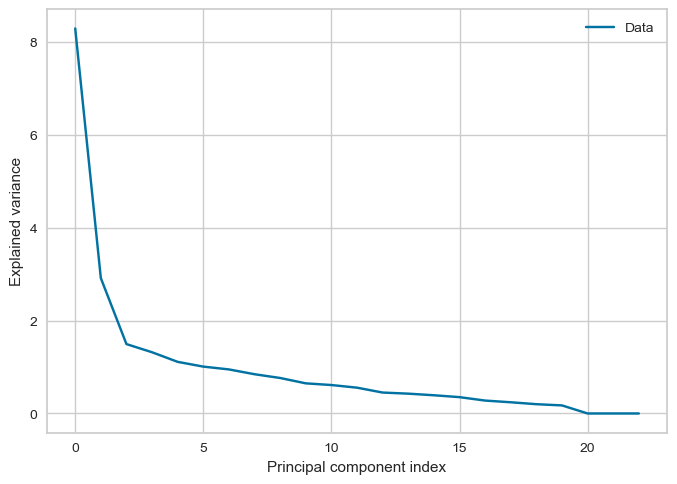

In [23]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.matplotlib_fname()
# Define the array
ev = [8.28505283e+00, 2.91329944e+00, 1.49317885e+00, 1.31724994e+00,
       1.11063290e+00, 1.00837773e+00, 9.47934549e-01, 8.44510443e-01,
       7.63484983e-01, 6.48332958e-01, 6.11921771e-01, 5.55103088e-01,
       4.50048396e-01, 4.26366869e-01, 3.91898395e-01, 3.51324474e-01,
       2.77519493e-01, 2.41092058e-01, 1.99477131e-01, 1.73596231e-01,
       1.59354751e-30, 1.85166030e-31, 7.38030774e-32]

# Plot the array
plt.plot(ev, label='Data')
plt.xlabel('Principal component index')
plt.ylabel('Explained variance')

# Add a legend and show the plot
plt.legend()
plt.show()


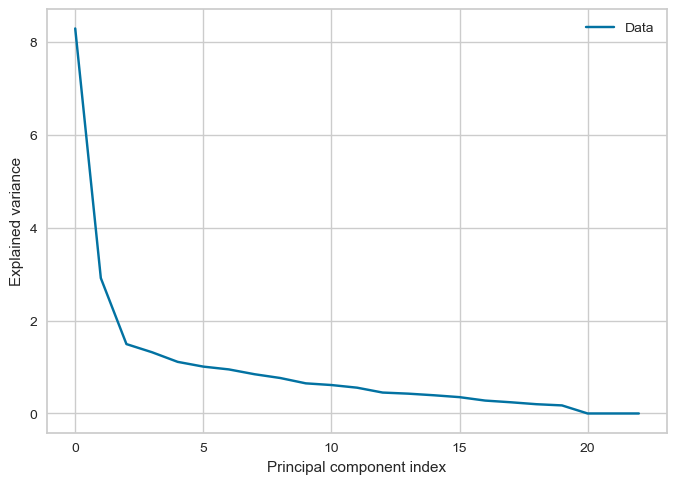

In [127]:


# Select the first three columns
PCAn = PCA.iloc[:, :3]


PCAn = PCAn.rename(columns={0: 'PCA1', 1: 'PCA2', 2: 'PCA3'})
PCAn

,PCA1,PCA2,PCA3
0,4.994347,-0.151247,2.647792
1,-2.884455,-0.006676,-1.863861
2,2.617864,-0.720770,-0.252259
3,-2.676036,-1.541974,-0.922759
4,-0.649591,0.209848,-0.021028
...,...,...,...
2207,2.321341,2.436277,0.518645
2208,-3.105957,4.020968,-1.499273
2209,2.673666,-1.869157,0.594264
2210,1.494055,1.701855,-1.627265


<IPython.core.display.Javascript object>


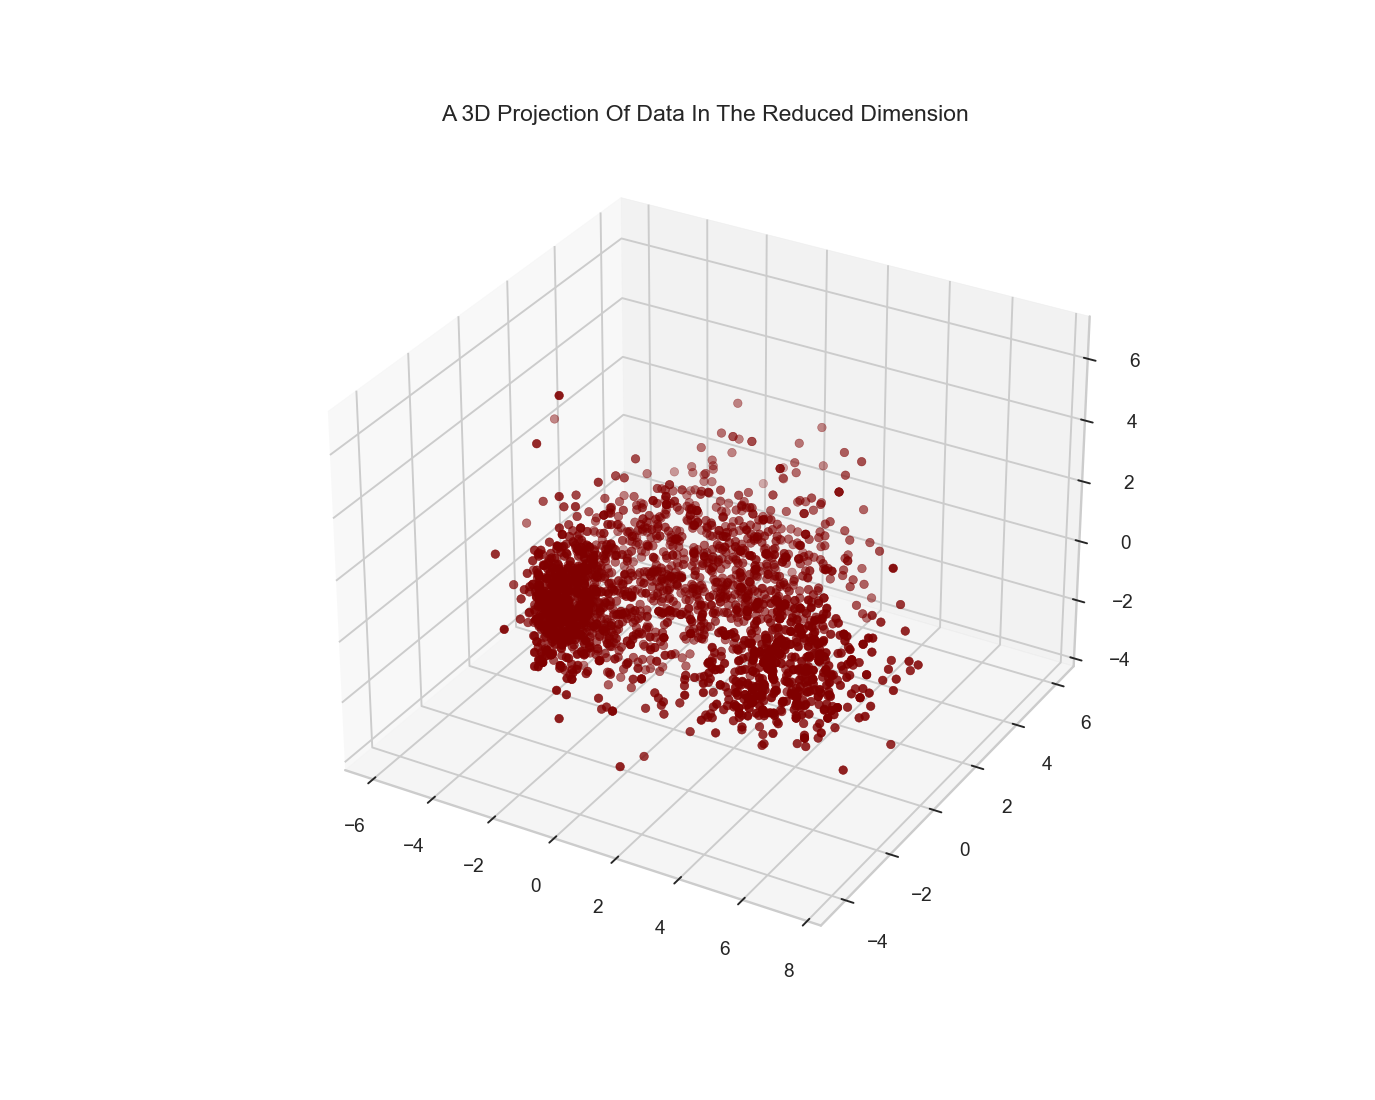

In [122]:
x =PCAn["PCA1"]
y =PCAn["PCA2"]
z =PCAn["PCA3"]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()


Elbow Method to determine the number of clusters to be formed:


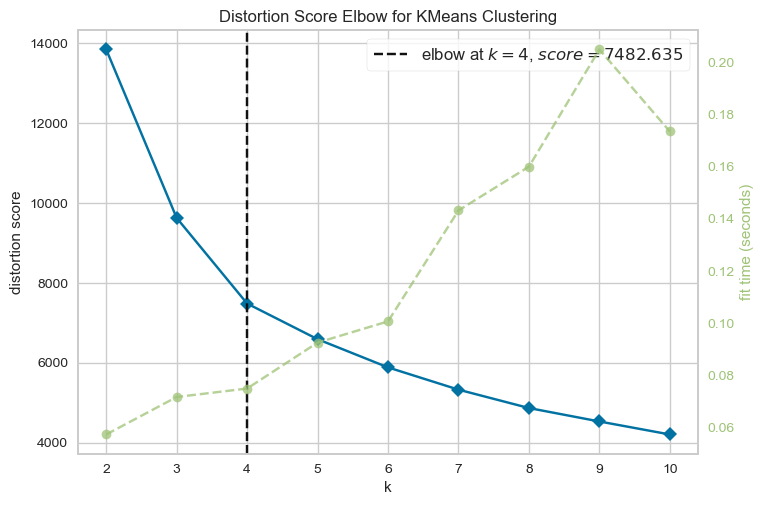

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
# Quick examination of elbow method to find numbers of clusters to make.
#print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCAn)
Elbow_M.show()

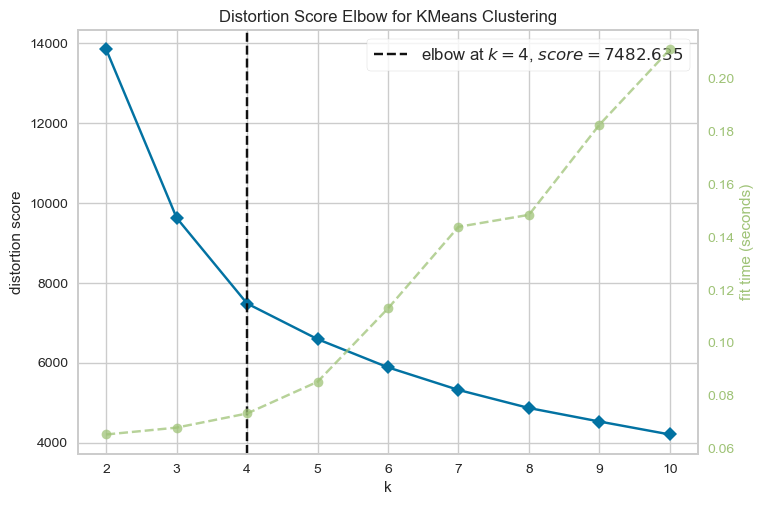

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:


# k is range of number of clusters.
visualizer = KElbowVisualizer(KMeans(), k=10)
visualizer.fit(PCAn)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

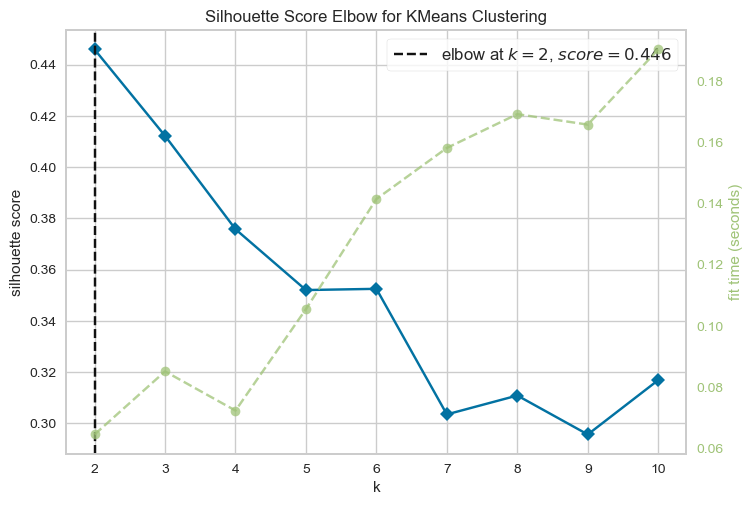

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [60]:

# k is range of number of clusters.
visualizer = KElbowVisualizer(KMeans(),metric='silhouette', k=10)
visualizer.fit(PCAn)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

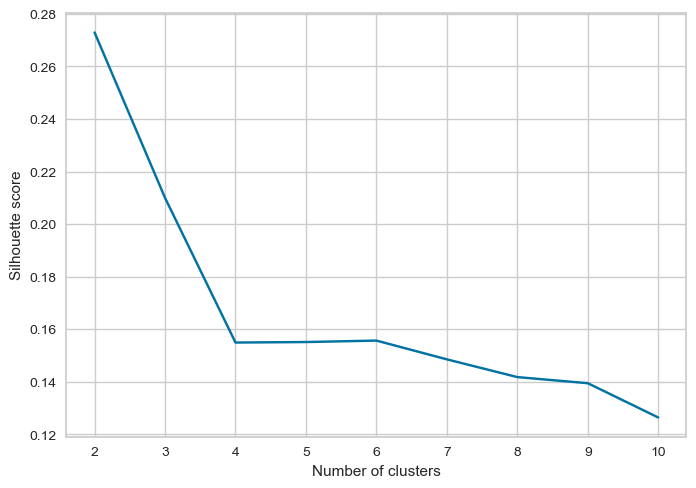

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd



# Create an empty list to store the results
results = []

# Fit a KMeans model for each number of clusters and store the results
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(PCA)
    results.append({'num_clusters': i, 'score': silhouette_score(PCA, kmeans.labels_)})

# Plot the results
plt.plot([r['num_clusters'] for r in results], [r['score'] for r in results])
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


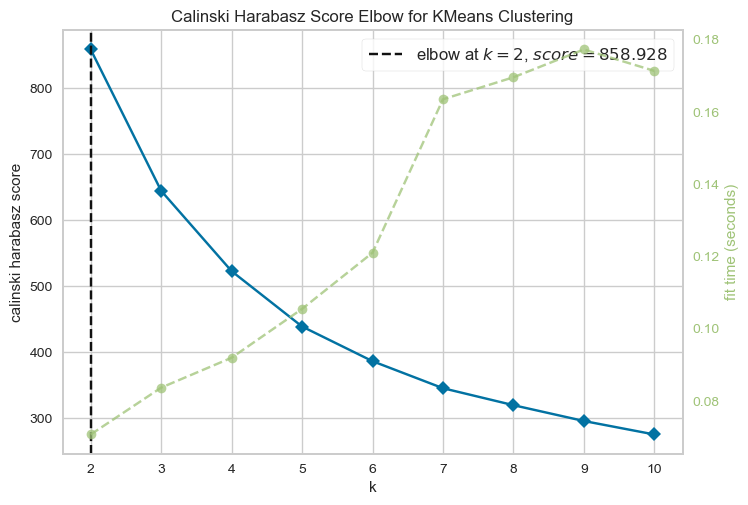

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [50]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=10,metric='calinski_harabasz', timings= True)
visualizer.fit(PCAn)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [123]:
from sklearn.cluster import KMeans
# Create a KMeans model
KM = KMeans(n_clusters=4)

# Fit the model to the data
KM.fit(PCAn)

# Get the cluster labels
labels = KM.labels_

# Add the labels to the DataFrame
PCAn['cluster'] = labels
labels



array([2, 1, 2, ..., 2, 3, 1])

In [139]:
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCAn)
PCAn["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

PCAn

,PCA1,PCA2,PCA3,Clusters
0,4.994347,-0.151247,2.647792,2
1,-2.884455,-0.006676,-1.863861,3
2,2.617864,-0.720770,-0.252259,2
3,-2.676036,-1.541974,-0.922759,1
4,-0.649591,0.209848,-0.021028,0
...,...,...,...,...
2207,2.321341,2.436277,0.518645,0
2208,-3.105957,4.020968,-1.499273,0
2209,2.673666,-1.869157,0.594264,2
2210,1.494055,1.701855,-1.627265,0


<IPython.core.display.Javascript object>


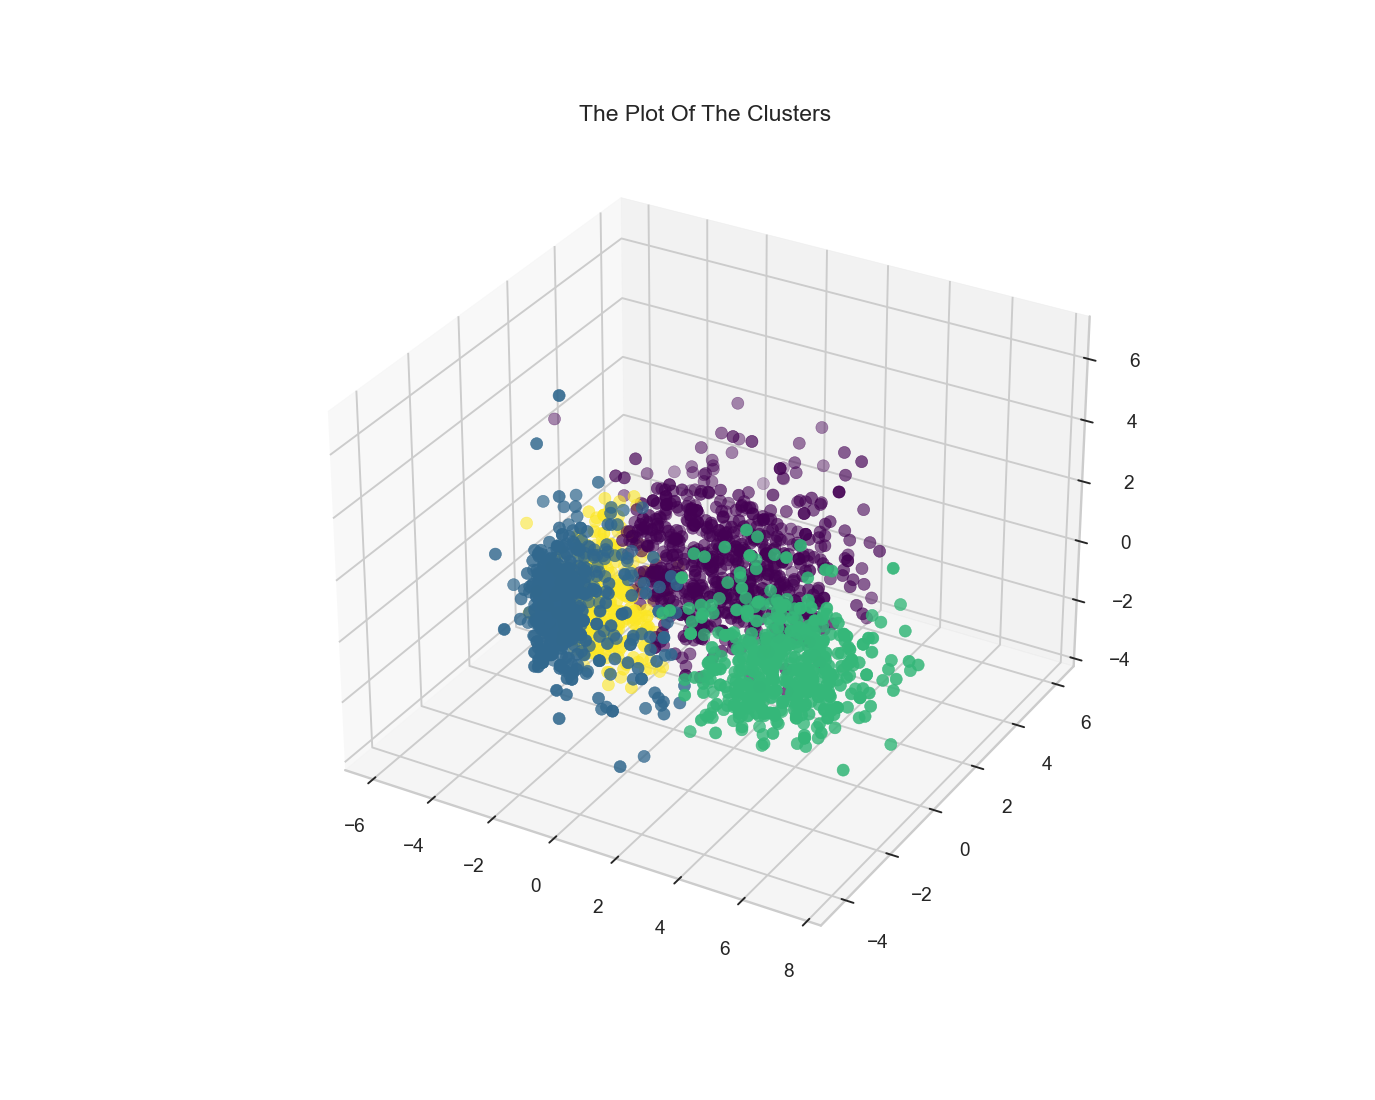

In [134]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=PCAn["Clusters"], cmap= 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [149]:


# Group the data by cluster
clusters = pd.DataFrame(PCAn.groupby('Clusters'))



,0,1
0,0,PCA1 PCA2 PCA3 Clusters 4...
1,1,PCA1 PCA2 PCA3 Clusters 3...
2,2,PCA1 PCA2 PCA3 Clusters 0...
3,3,PCA1 PCA2 PCA3 Clusters 1...


<IPython.core.display.Javascript object>


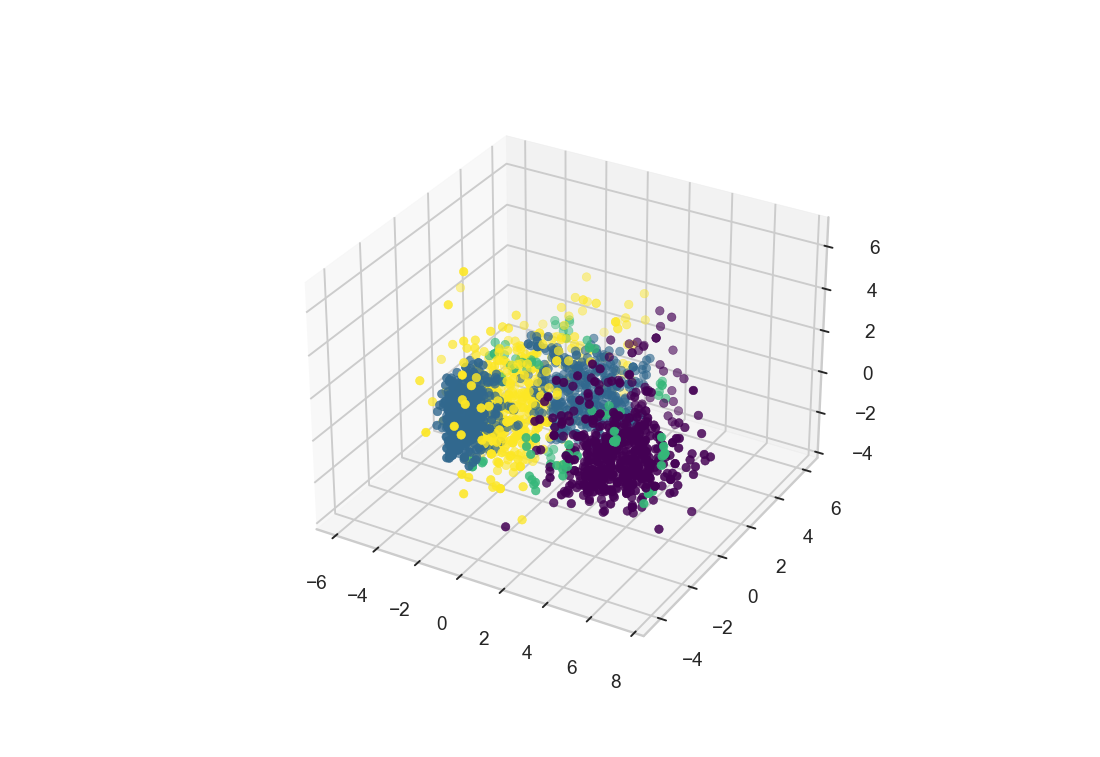

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

In [118]:
import matplotlib.pyplot as plt
import pandas as pd



# Get the cluster labels
labels = PCAn['cluster']


# Get the x, y, and z data
x = PCAn['PCA1']
y = PCAn['PCA2']
z = PCAn['PCA3']

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=labels, cmap='viridis')

# Add a legend and show the plot
plt.colorbar()
plt.show()


<IPython.core.display.Javascript object>


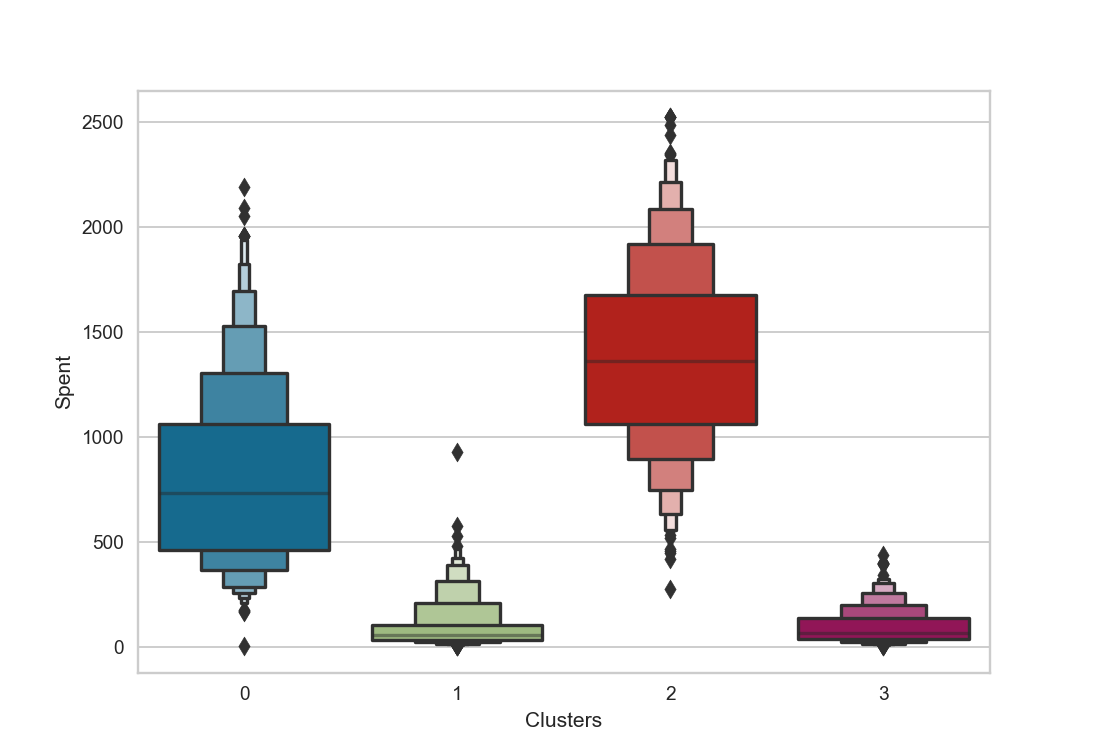

In [155]:
plt.figure()
#pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"])
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"])
plt.show()

<IPython.core.display.Javascript object>


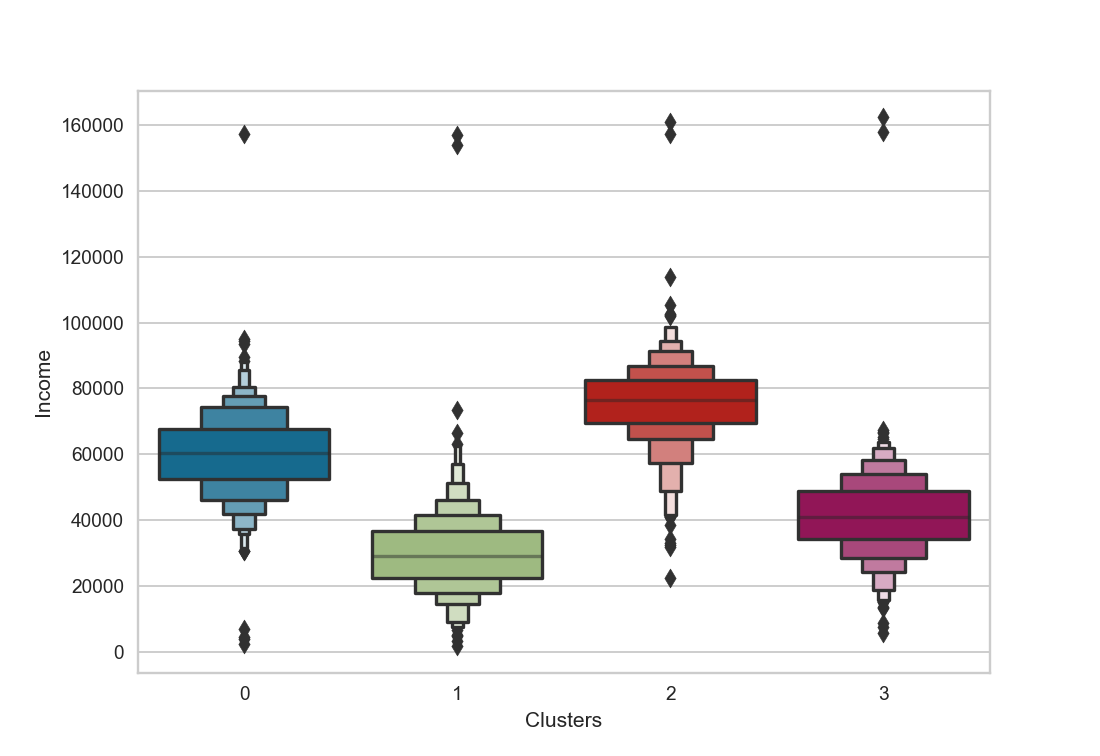

In [159]:
plt.figure()

pl=sns.boxenplot(x=data["Clusters"], y=data["Income"])
plt.show()

<IPython.core.display.Javascript object>


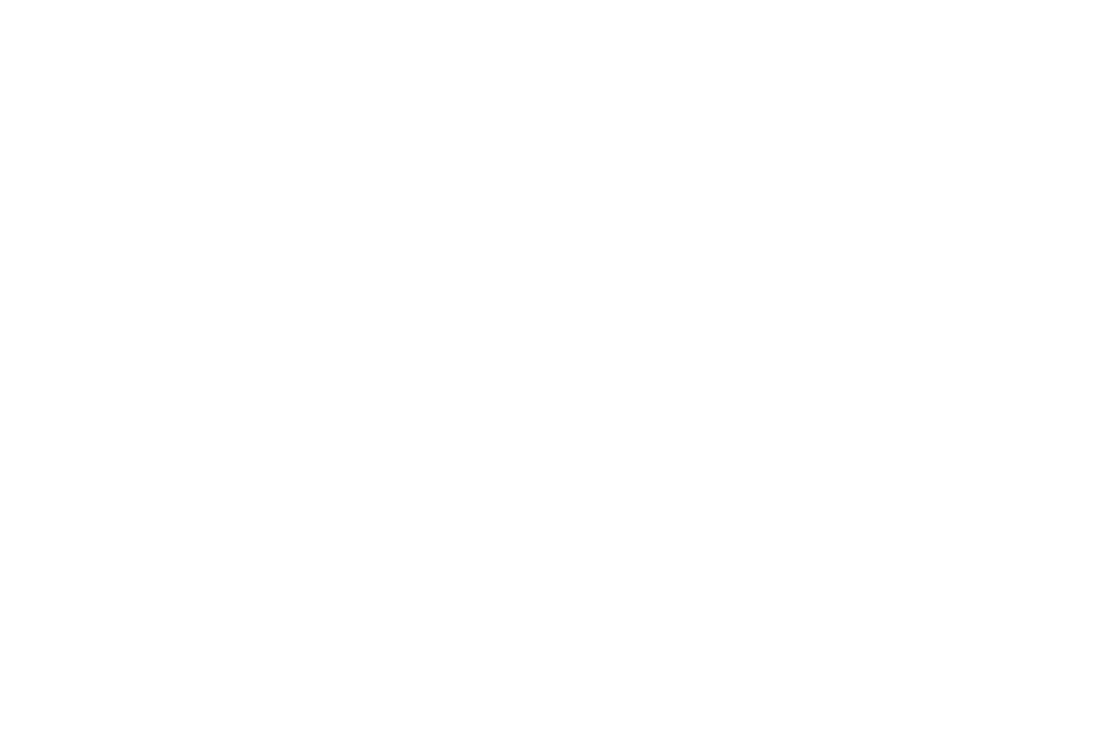

<IPython.core.display.Javascript object>


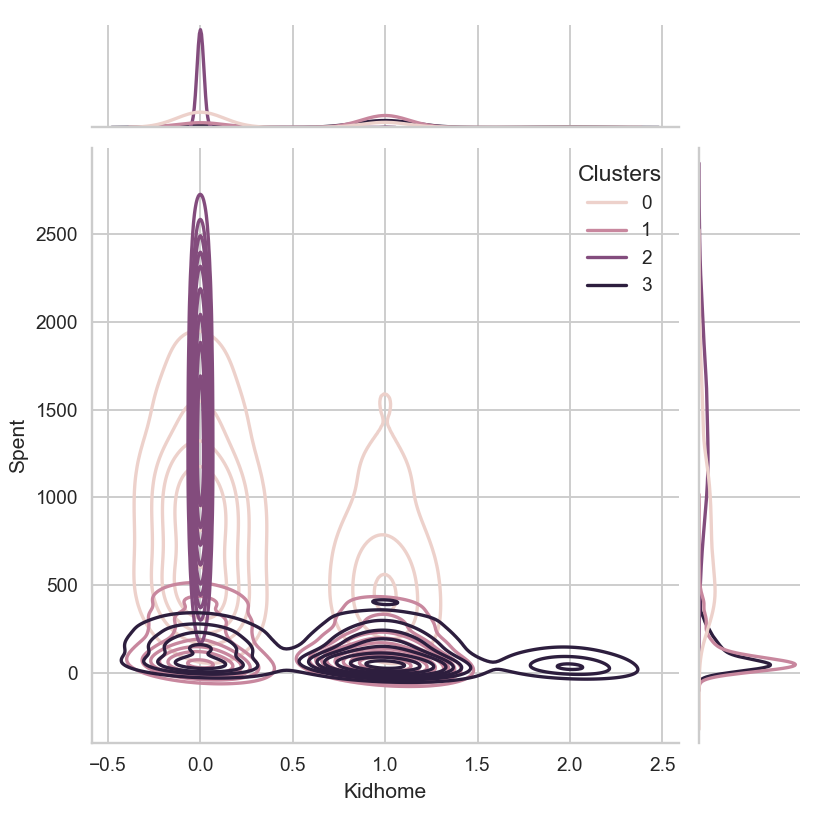

In [170]:
#Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
plt.ioff()

plt.figure()
sns.jointplot(x=data["Kidhome"], y=data["Spent"], hue =data["Clusters"], kind="kde")
plt.show()

<IPython.core.display.Javascript object>


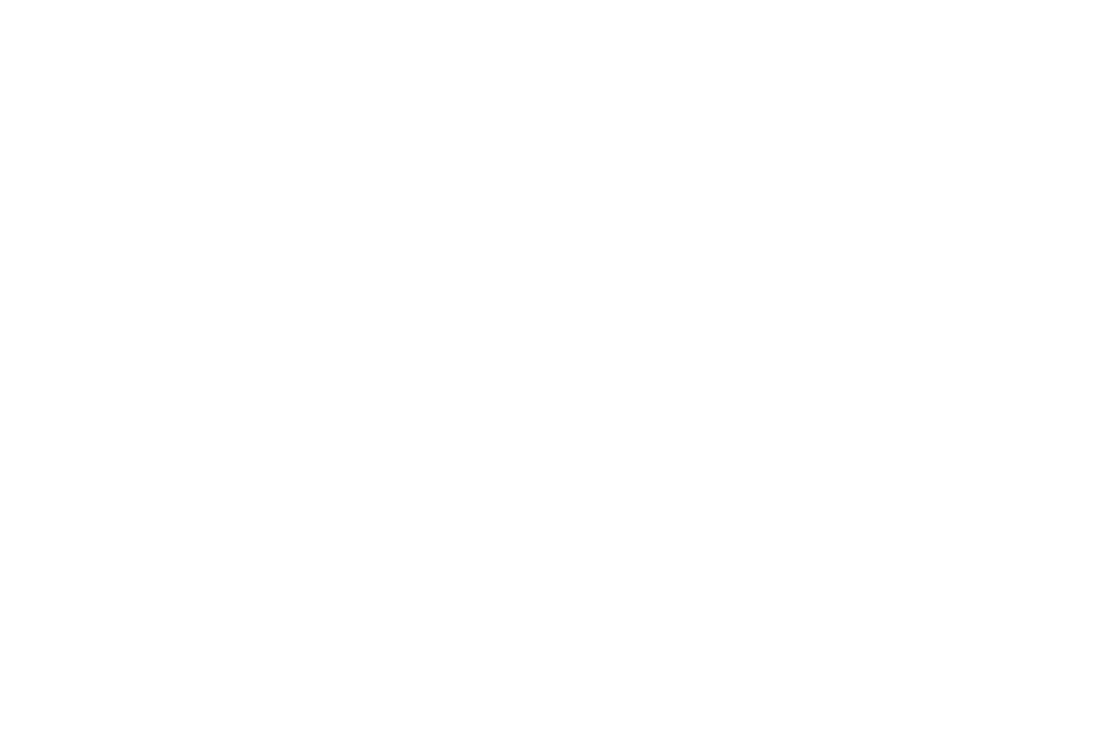

<IPython.core.display.Javascript object>


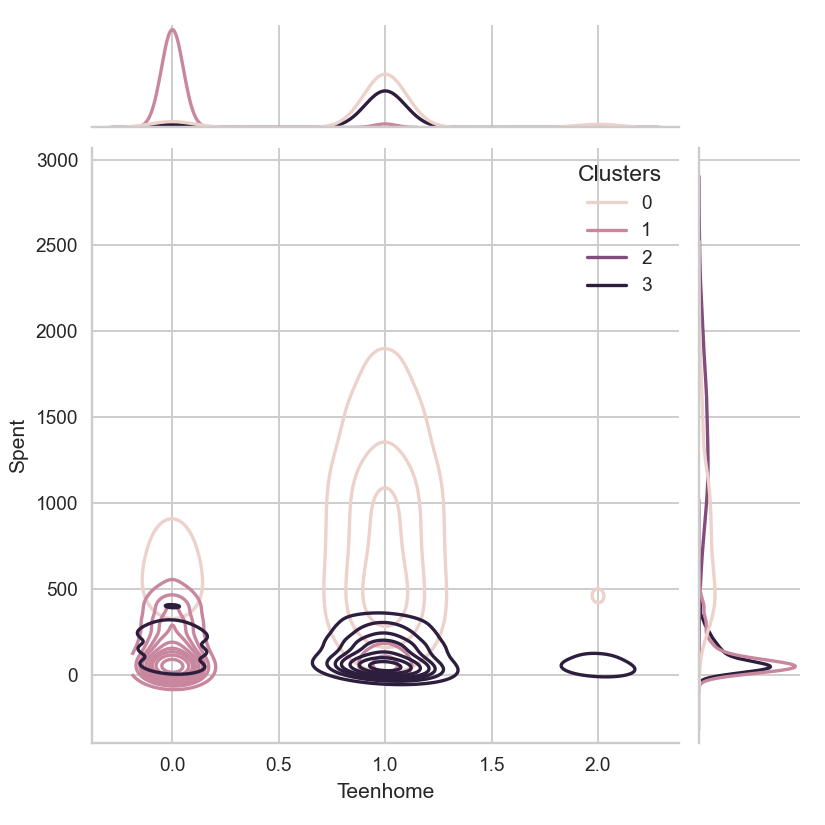

In [171]:
plt.figure()
sns.jointplot(x=data["Teenhome"], y=data["Spent"], hue =data["Clusters"], kind="kde")
plt.show()
plt.ioff()

<IPython.core.display.Javascript object>


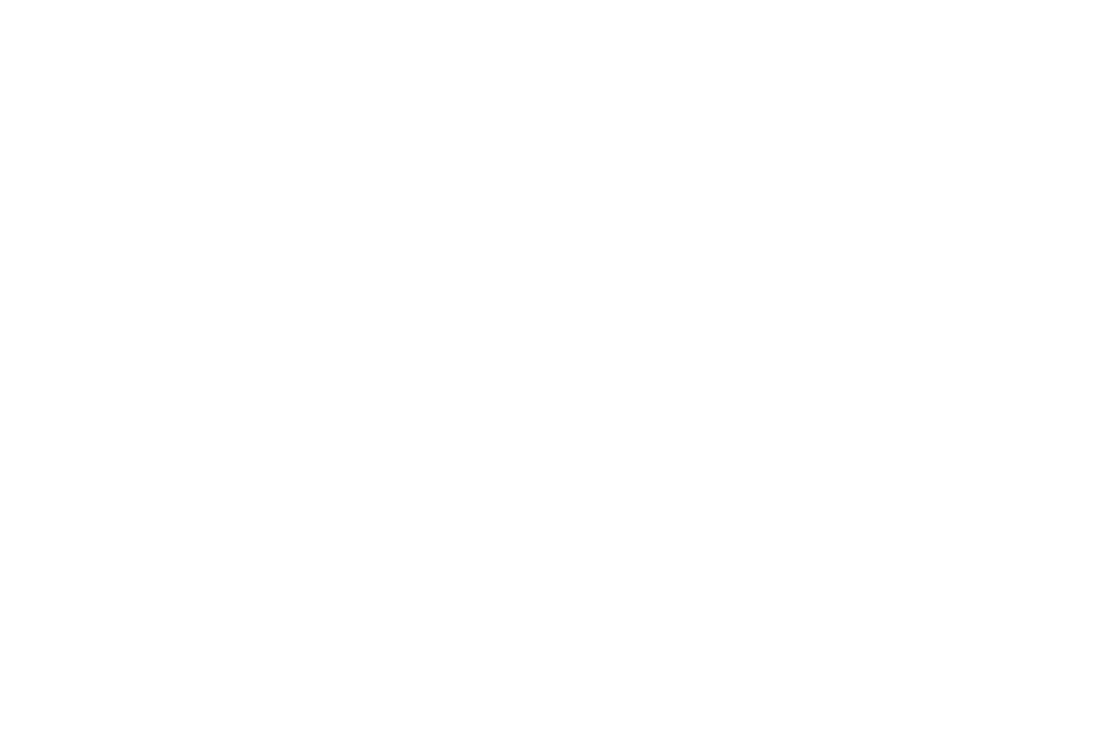

<IPython.core.display.Javascript object>


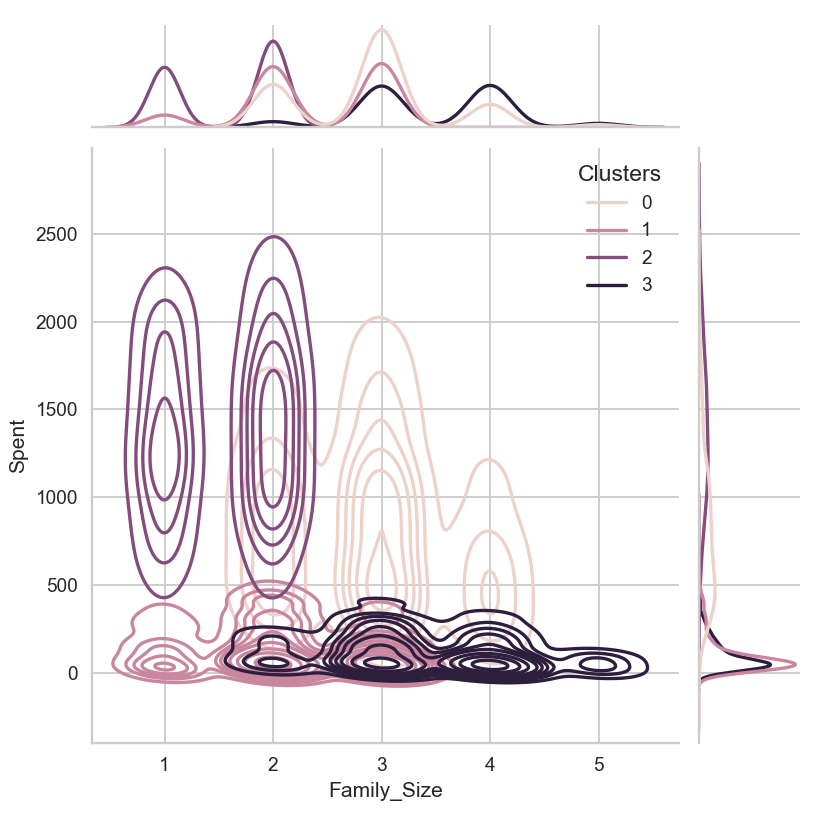

In [172]:
plt.figure()
sns.jointplot(x=data["Family_Size"], y=data["Spent"], hue =data["Clusters"], kind="kde")
plt.show()

<IPython.core.display.Javascript object>


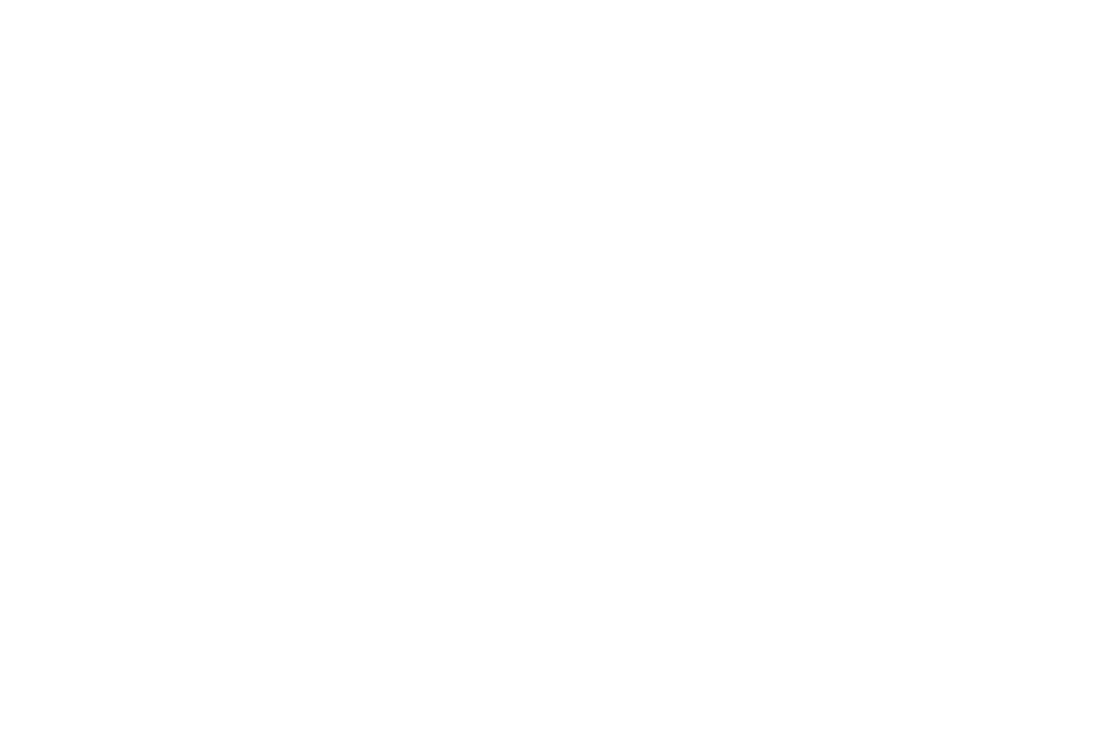

<IPython.core.display.Javascript object>


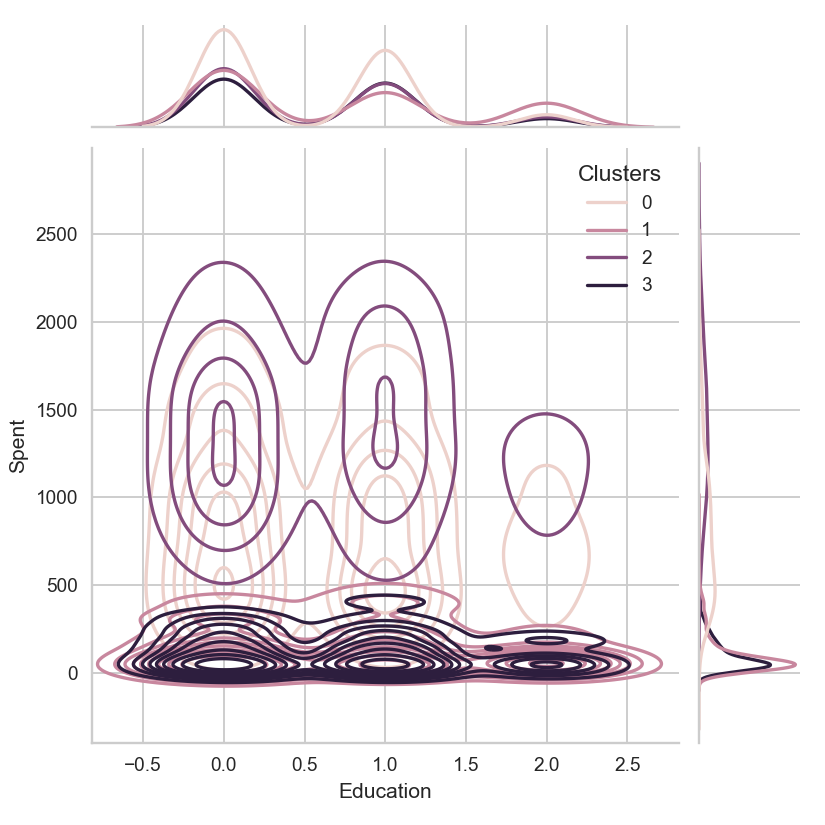

In [174]:
plt.figure()
sns.jointplot(x=data["Education"], y=data["Spent"], hue =data["Clusters"], kind="kde")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN


# Create a DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=10)

# Fit the model to the data
dbscan.fit(PCAn)

# Get the cluster labels
labelsdb = dbscan.labels_
PCAn['clusterdb'] = labelsdb

# Count the number of clusters
num_clusters = len(set(labelsdb))

# Print the number of clusters
print(f'Number of clusters: {num_clusters}')


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook


# Get the x, y, and z data
x = PCAn['PCA1']
y = PCAn['PCA2']
z = PCAn['PCA3']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,c=labelsdb, cmap='viridis')

# Set the initial viewing angle
ax.view_init(30, 45)

# Show the plot
plt.show()



In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Create a NearestNeighbors model
nn = NearestNeighbors(n_neighbors=2)

# Fit the model to the data
nn.fit(PCAn)

# Get the distances and indices of the nearest neighbors
distances, indices = nn.kneighbors(PCAn)

# Get the distance to the nearest neighbor for each point
distances = distances[:,1]

# Sort the distances in ascending order
distances = np.sort(distances)

# Plot the distances
plt.plot(distances)
plt.show()